<a href="https://colab.research.google.com/github/AdityaAK50/Data-Analyst/blob/main/Cybersecurity__Suspicious_Web_Threat_Interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean the dataset to ensure accuracy in analysis.


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [ ]:
data_cleaned = data.dropna()
print(data_cleaned.head())

   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious Web Traffic  

In [ ]:
data_cleaned['src_ip_country_code'] = data_cleaned['src_ip_country_code'].astype('category').cat.codes
data_cleaned['protocol'] = data_cleaned['protocol'].astype('category').cat.codes

In [ ]:
print(data_cleaned['protocol'])

0      0
1      0
2      0
3      0
4      0
      ..
277    0
278    0
279    0
280    0
281    0
Name: protocol, Length: 282, dtype: int8


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
data_cleaned[['bytes_in', 'bytes_out']] = scaler.fit_transform(data_cleaned[['bytes_in', 'bytes_out']])

In [ ]:
print(data_cleaned[['bytes_in', 'bytes_out']])

     bytes_in  bytes_out
0    0.000221   0.008292
1    0.001225   0.011621
2    0.001129   0.008599
3    0.001210   0.009117
4    0.000257   0.008870
..        ...        ...
277  0.001638   0.008414
278  0.000143   0.002015
279  1.000000   1.000000
280  0.000226   0.007731
281  0.000357   0.003727

[282 rows x 2 columns]


In [ ]:
print("\nData Types After Preprocessing:")
print(data_cleaned.dtypes)


Data Types After Preprocessing:
bytes_in               float64
bytes_out              float64
creation_time           object
end_time                object
src_ip                  object
src_ip_country_code       int8
protocol                  int8
response.code            int64
dst_port                 int64
dst_ip                  object
rule_names              object
observation_name        object
source.meta             object
source.name             object
time                    object
detection_types         object
dtype: object


In [ ]:
print("\nCleaned Data:")
print(data_cleaned.head())


Cleaned Data:
   bytes_in  bytes_out         creation_time              end_time  \
0  0.000221   0.008292  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1  0.001225   0.011621  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2  0.001129   0.008599  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3  0.001210   0.009117  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4  0.000257   0.008870  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip  src_ip_country_code  protocol  response.code  dst_port  \
0   147.161.161.82                    0         0            200       443   
1     165.225.33.6                    6         0            200       443   
2  165.225.212.255                    2         0            200       443   
3   136.226.64.114                    6         0            200       443   
4   165.225.240.79                    5         0            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.9

In [ ]:
data_cleaned.to_csv('/content/Cleaned_CloudWatch_Traffic_Web_Attack.csv', index=False)

# Exploratory Data Analysis (EDA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

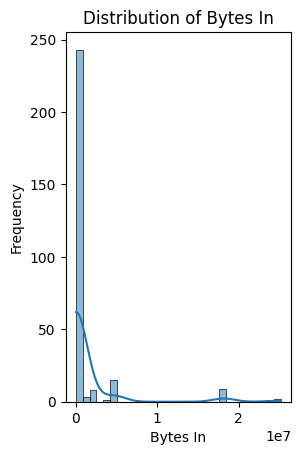

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(data['bytes_in'], bins=30, kde=True)
plt.title('Distribution of Bytes In')
plt.xlabel('Bytes In')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

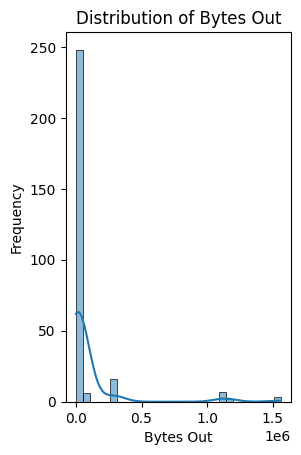

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data['bytes_out'], bins=30, kde=True)
plt.title('Distribution of Bytes Out')
plt.xlabel('Bytes Out')
plt.ylabel('Frequency')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_matrix = numeric_data.corr()

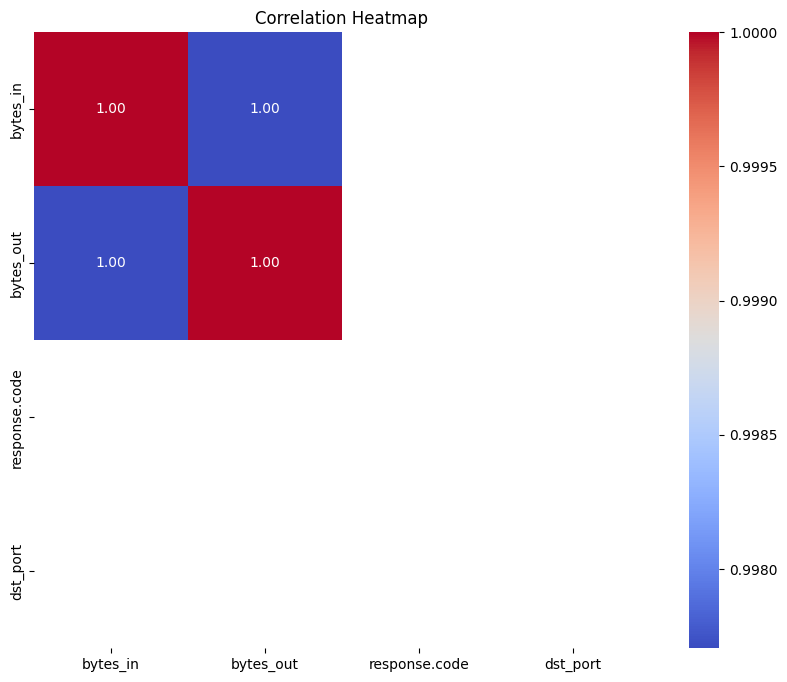

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
common_issues = data['observation_name'].value_counts()

In [ ]:
print("\nTop 10 Common Issues Raised in Tickets:")
print(common_issues.head(10))



Top 10 Common Issues Raised in Tickets:
observation_name
Adversary Infrastructure Interaction    282
Name: count, dtype: int64


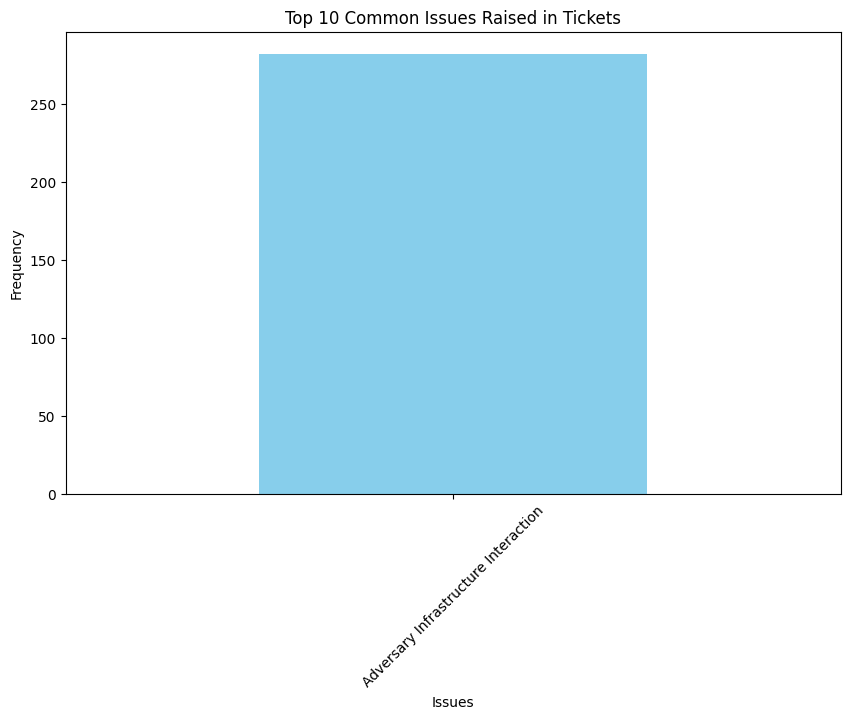

In [ ]:
plt.figure(figsize=(10, 6))
common_issues.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Common Issues Raised in Tickets')
plt.xlabel('Issues')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious

In [ ]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [ ]:
data['interaction_duration'] = (data['end_time'] - data['creation_time']).dt.total_seconds()

In [ ]:
latest_interaction_time = data['end_time'].max()
data['time_since_last_interaction'] = (latest_interaction_time - data['end_time']).dt.total_seconds()

In [ ]:
data['response_category'] = pd.cut(data['response.code'], bins=[0, 199, 299, 399, 499, 599],
                                    labels=['Success', 'Redirection', 'Client Error', 'Server Error', 'Unknown'])

In [ ]:
print("\nData with New Features:")
print(data[['interaction_duration', 'time_since_last_interaction', 'response_category']].head())


Data with New Features:
   interaction_duration  time_since_last_interaction response_category
0                 600.0                      39000.0       Redirection
1                 600.0                      39000.0       Redirection
2                 600.0                      39000.0       Redirection
3                 600.0                      39000.0       Redirection
4                 600.0                      39000.0       Redirection


In [ ]:
data['bytes_in_category'] = pd.cut(data['bytes_in'], bins=[0, 10000, 50000, 100000, 500000, float('inf')],
                                    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [ ]:
data['bytes_out_category'] = pd.cut(data['bytes_out'], bins=[0, 10000, 50000, 100000, 500000, float('inf')],
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [ ]:
print("\nUpdated Data with Categorical Features:")
print(data[['bytes_in_category', 'bytes_out_category']].head())


Updated Data with Categorical Features:
  bytes_in_category bytes_out_category
0          Very Low                Low
1               Low                Low
2               Low                Low
3               Low                Low
4          Very Low                Low


In [ ]:
data.to_csv('/content/Updated_CloudWatch_Traffic_Web_Attack.csv', index=False)

# Model Building


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious

In [ ]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [ ]:
data['response_category'] = pd.cut(data['response.code'], bins=[0, 199, 299, 399, 499, 599],
                                    labels=['Success', 'Redirection', 'Client Error', 'Server Error', 'Unknown'])

In [ ]:
data['src_ip_country_code'] = data['src_ip_country_code'].astype('category').cat.codes
data['protocol'] = data['protocol'].astype('category').cat.codes
data['response_category'] = data['response_category'].astype('category').cat.codes

In [ ]:
X = data.drop(columns=['response.code', 'creation_time', 'end_time', 'observation_name'])
y = data['response.code']

In [ ]:
X = X.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



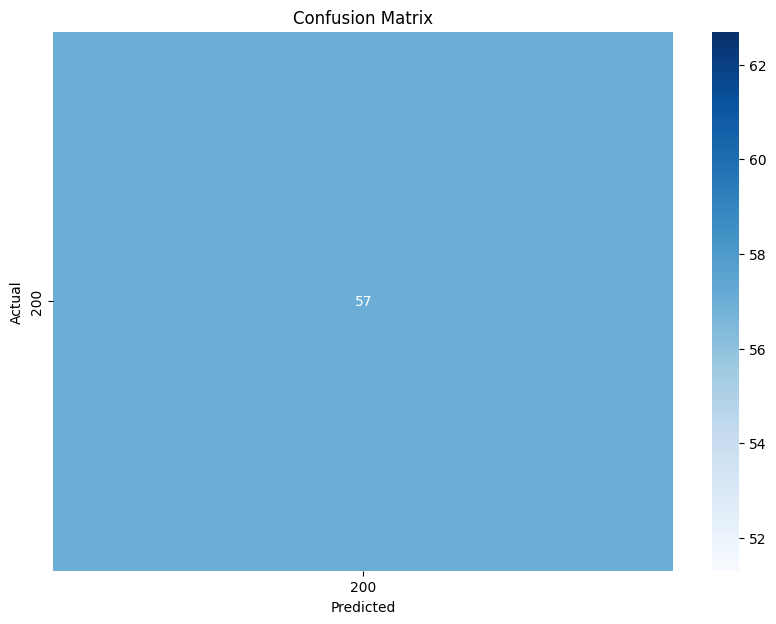

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

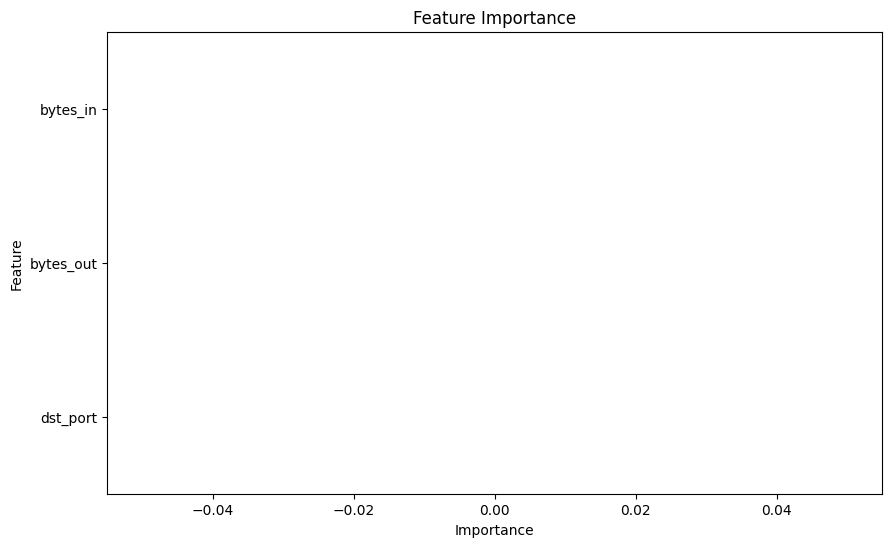

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



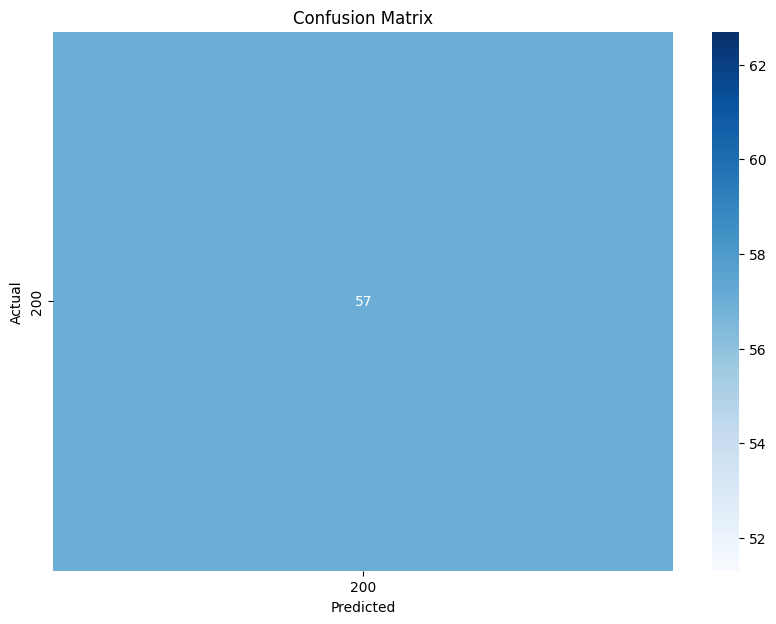

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

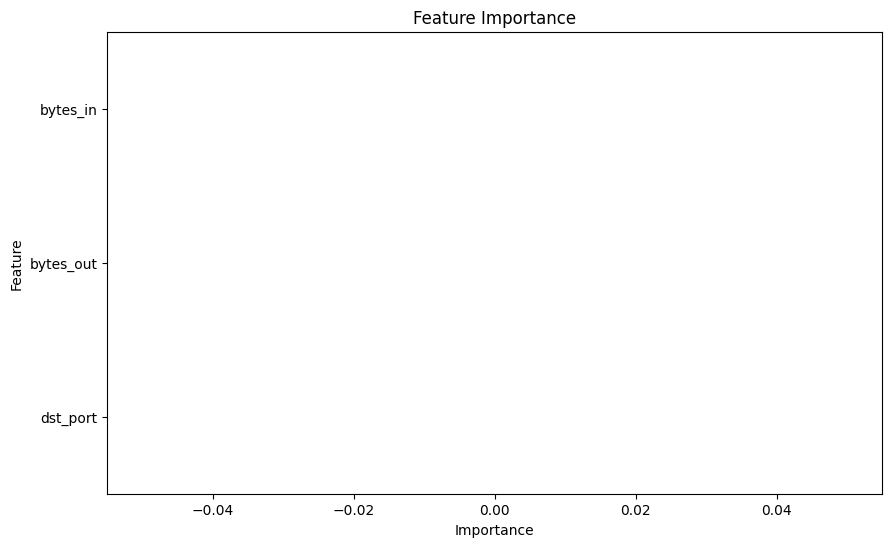

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Visualization of Results


In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html
import plotly.express as px

In [ ]:
pip install pandas scikit-learn matplotlib seaborn dash plotly

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['response_category'] = pd.cut(data['response.code'], bins=[0, 199, 299, 399, 499, 599],
                                    labels=['Success', 'Redirection', 'Client Error', 'Server Error', 'Unknown'])
data['src_ip_country_code'] = data['src_ip_country_code'].astype('category').cat.codes
data['protocol'] = data['protocol'].astype('category').cat.codes
data['response_category'] = data['response_category'].astype('category').cat.codes

In [ ]:
X = data.drop(columns=['response.code', 'creation_time', 'end_time', 'observation_name'])
y = data['response.code']
X = X.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



In [ ]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

<ipython-input-208-eea03cca600f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




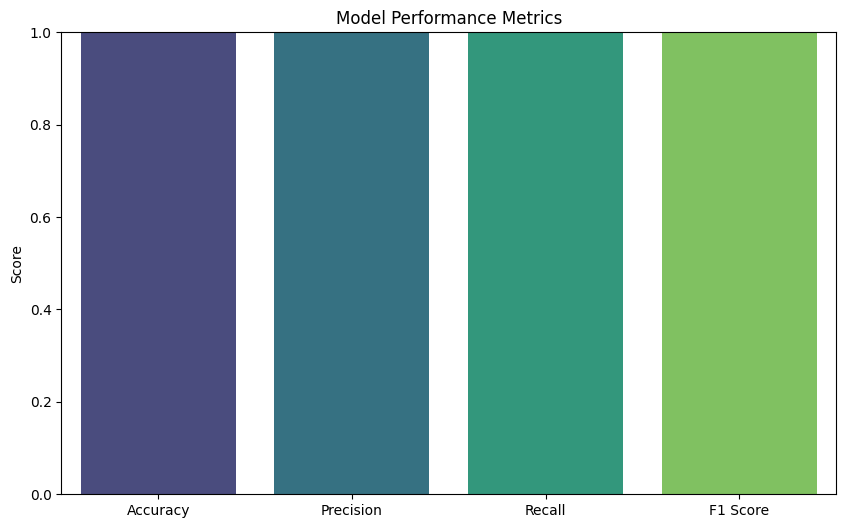

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

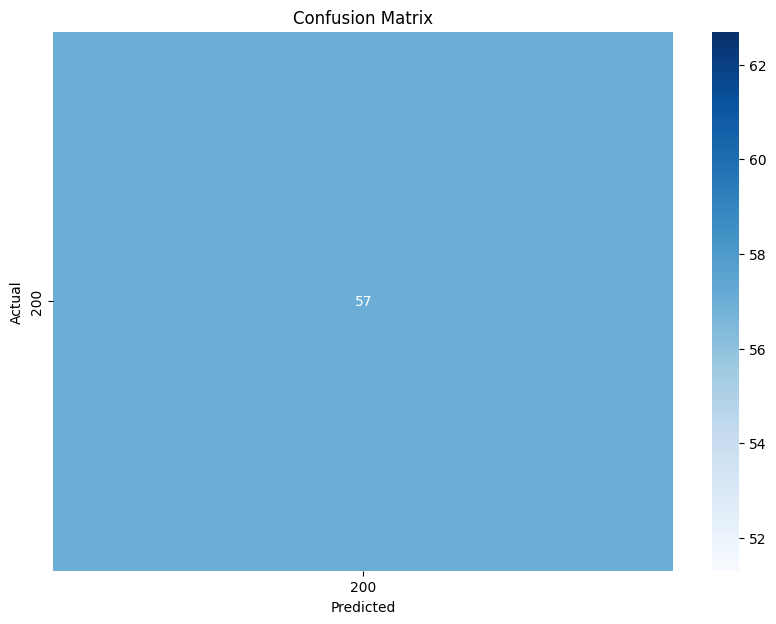

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

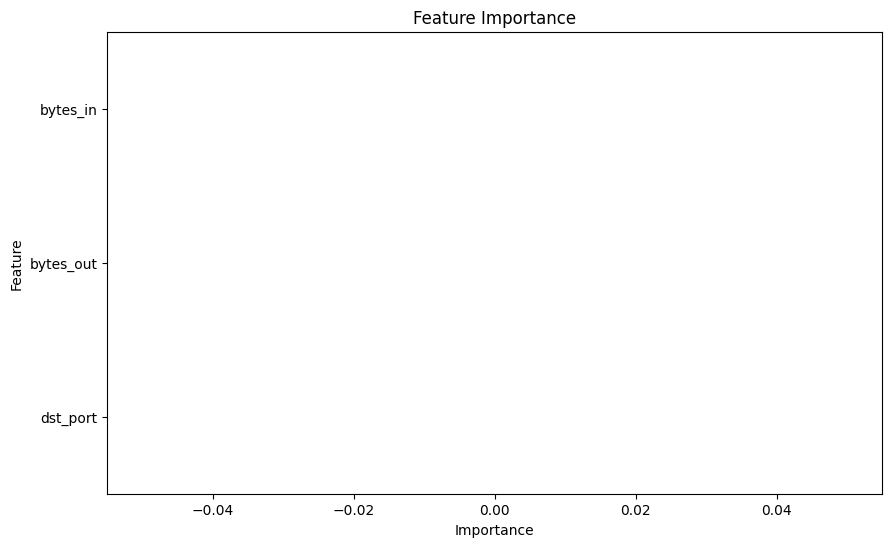

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Customer Segmentation Analysis


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:

file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['response_category'] = pd.cut(data['response.code'], bins=[0, 199, 299, 399, 499, 599],
                                    labels=['Success', 'Redirection', 'Client Error', 'Server Error', 'Unknown'])
data['src_ip_country_code'] = data['src_ip_country_code'].astype('category').cat.codes
data['protocol'] = data['protocol'].astype('category').cat.codes
data['response_category'] = data['response_category'].astype('category').cat.codes

In [ ]:
features = data[['src_ip_country_code', 'protocol', 'response.code', 'bytes_in', 'bytes_out']]
X = features.dropna()  # Drop any rows with missing values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

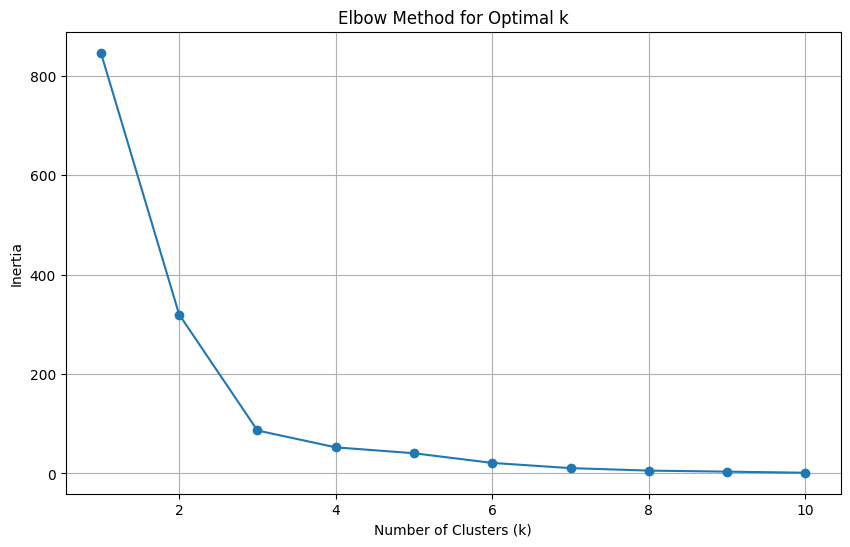

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_analysis = data.groupby('cluster').mean(numeric_only=True)
print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
             bytes_in     bytes_out  src_ip_country_code  protocol  \
cluster                                                              
0        1.542768e+04  1.398054e+04             1.817518       0.0   
1        1.988073e+07  1.238034e+06             6.000000       0.0   
2        7.334265e+05  5.317725e+04             5.654135       0.0   

         response.code  dst_port  response_category  
cluster                                              
0                200.0     443.0                1.0  
1                200.0     443.0                1.0  
2                200.0     443.0                1.0  


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

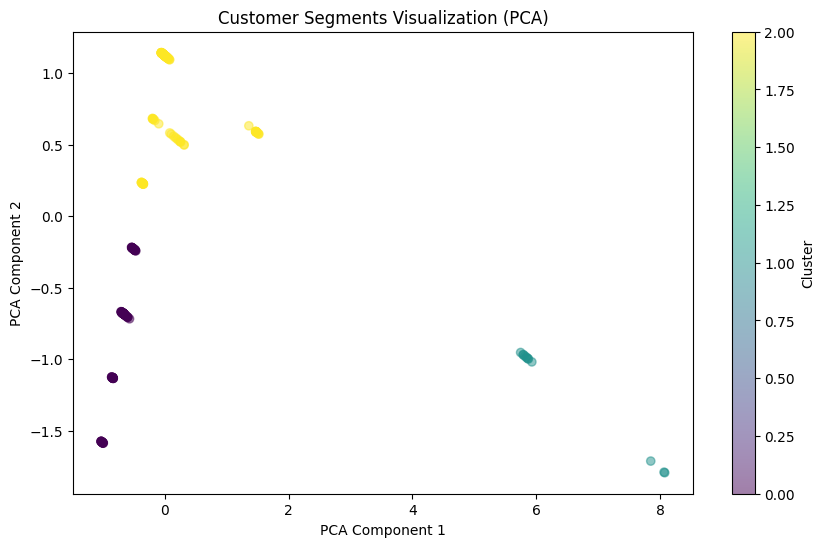

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Sentiment Analysis

In [ ]:
pip install pandas textblob matplotlib seaborn

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/CloudWatch_Traffic_Web_Attack.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious

In [ ]:
if 'ticket_description' in data.columns:
    data['sentiment'] = data['ticket_description'].apply(lambda x: TextBlob(x).sentiment.polarity)
    print("\nData with Sentiment Scores:")
    print(data[['ticket_description', 'sentiment']].head())
    if 'response.code' in data.columns:
        correlation = data[['sentiment', 'response.code']].corr()
        print("\nCorrelation between Sentiment Scores and Customer Satisfaction Ratings:")
        print(correlation)

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='sentiment', y='response.code', data=data)
        plt.title('Sentiment Scores vs Customer Satisfaction Ratings')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Customer Satisfaction Rating (Response Code)')
        plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
        plt.legend()
        plt.show()

        avg_sentiment = data['sentiment'].mean()
        print(f"\nAverage Sentiment Score: {avg_sentiment:.2f}")
        print("Conducting these analyses provides valuable insights into customer satisfaction trends, "
              "identifies areas for improvement in customer support, and helps in developing predictive models "
              "that can enhance customer experience.")
    else:
        print("The dataset does not contain a 'response.code' column.")
else:
    print("The dataset does not contain a 'ticket_description' column.")

The dataset does not contain a 'ticket_description' column.
